## Assignment 5
### Objective: Identify presence of heart disease.

#### Dataset
Data: https://www.kaggle.com/ronitf/heart-disease-uci

##### Possible Work to be done
1.	What is the primary objective that you are addressing and why?
2.	For all the independent variables given, state the discrete variables and their types (For example Nominal/Ordinal …).
3.	Find the independent variables which are good candidates for data transformation
4.	Transform any one variable which is interval/ratio to categorical variable
5.	Transform any one variable which is interval/ratio to ordinal variable
6.	Is there any association between any two interval/ratio variable. How will you go about it?
7.	Which graph type would you prefer to use for visualizing each variable
8.	What will be your criteria to select the classification algorithm?
9.	How will you evaluate the performance of two classifier that you investigated and state which is better
10. Can you deploy your model in real time? What are the challenges?


In [1]:
import numpy as np
import pandas as pd

In [2]:
heart_disease_dataset = pd.read_csv("./heart.csv") 
print("The data set has {} rows and {} columns".
      format(heart_disease_dataset.shape[0],
             heart_disease_dataset.shape[1]))

The data set has 303 rows and 14 columns


### 1.	What is the primary objective that you are addressing and why?

This dataset gives a number of variables along with a target condition of having or not having heart disease. 
#### Our "primary objective" is to use this data set and build a machine learning model which would help doctors to predict the presence of heart disease in the patient.

### 2. For all the independent variables given, state the discrete variables and their types (For example Nominal/Ordinal …).

In [3]:
# Find the uniqe values of each variable.
heart_disease_dataset.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Considering unique values of columns, there are 13 independent variables and 1 target variable. Out of 13 independent 8 variables are discrete and 5 continuous. 

### Discrete Independent Variables and Types (Total 8 Discrete variables)

#### A. Nominal , Binary
1. sex (0 = female; 1 = male)
2. fbs: Fasting blood sugar > 120 mg/dl (0 = no; 1 = yes)
3. exang: Exercise induced angina (0 = no; 1 = yes)

#### B. Nominal , Categorical
1. cp: Chest pain type (0 = Asymptomatic angina; 1 = Atypical angina; 2 = Non-angina; 3 = Typical angina)
2. restecg: Resting ECG (0 = Left ventricular hypertrophy; 1 = Normal; 2 = ST-T wave abnormality)
3. slope: Slope of the peak exercise ST segment (0 = downsloping; 1 = upsloping; 2 = flat)
4. thal: Thalium stress test result (0 = NA; 1 = Fixed defect; 2 = Normal; 3 = Reversible defect)

#### C. Ordinal
1. ca: number of major vessels (0-3)




### Continuous variables ( Total 5 Continuous variables)
1. age - The person's age in years
2. chol - The person's cholesterol measurement in mg/dl
3. trestbps - The person's resting blood pressure
4. thalach - The person's maximum heart rate achieved
5. oldpeak - ST depression induced by exercise relative to rest

### 3.	Find the independent variables which are good candidates for data transformation

#### Update discrete attribute values (features) for better readability & plotting.

In [4]:
heart_disease_dataset['sex'] = heart_disease_dataset['sex'].map({0:'female', 1:'male'})
heart_disease_dataset['cp'] = heart_disease_dataset['cp'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})
heart_disease_dataset['fbs'] = heart_disease_dataset['fbs'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
heart_disease_dataset['restecg'] = heart_disease_dataset['restecg'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})
heart_disease_dataset['exang'] = heart_disease_dataset['exang'].map({
        0:'no', 1:'yes'})
heart_disease_dataset['slope'] = heart_disease_dataset['slope'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})
heart_disease_dataset['thal'] = heart_disease_dataset['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})
heart_disease_dataset['target'] = heart_disease_dataset['target'].map({0:'no disease', 1:'disease'})

heart_disease_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


### 4.	Transform any one variable which is interval/ratio to categorical variable

In [5]:
# Let's consider age variable
print('Min Age:', heart_disease_dataset['age'].unique().min())
print('Max Age:', heart_disease_dataset['age'].unique().max())

Min Age: 29
Max Age: 77


In [6]:
# Age is a continuous and ratio variable with min as 29 and 77 as max Let's convert them to categorical and add a new column 'agegroup' 
# next to age variable.
#(77 - 29) / 2 = 24;
# we will bin into two categories
# [29,53] - Adult
# [54 - 77] - Elderly

In [7]:
category = pd.cut(heart_disease_dataset.age,bins=[29,53,77],
       labels=['Adult','Elderly'])
heart_disease_dataset.insert(1,'agegroup',category)

In [8]:
heart_disease_dataset.sample(10)

,age,agegroup,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,56,Elderly,female,atypical angina,140,294,> 120 mg/dl,normal,153,no,1.3,flat,0,fixed defect,disease
150,66,Elderly,male,typical angina,160,228,> 120 mg/dl,normal,138,no,2.3,downsloping,0,normal 1,disease
91,57,Elderly,male,typical angina,132,207,> 120 mg/dl,ST-T wave abnormality,168,yes,0.0,downsloping,0,reversable defect,disease
182,61,Elderly,female,typical angina,130,330,> 120 mg/dl,normal,169,no,0.0,downsloping,0,fixed defect,no disease
253,67,Elderly,male,typical angina,100,299,> 120 mg/dl,normal,125,yes,0.9,flat,2,fixed defect,no disease
62,52,Adult,male,asymptomatic,118,186,> 120 mg/dl,normal,190,no,0.0,flat,0,normal 1,disease
189,41,Adult,male,typical angina,110,172,> 120 mg/dl,normal,158,no,0.0,downsloping,0,reversable defect,no disease
209,59,Elderly,male,typical angina,140,177,> 120 mg/dl,ST-T wave abnormality,162,yes,0.0,downsloping,1,reversable defect,no disease
267,49,Adult,male,non-anginal,118,149,> 120 mg/dl,normal,126,no,0.8,downsloping,3,fixed defect,no disease
237,60,Elderly,male,typical angina,140,293,> 120 mg/dl,normal,170,no,1.2,flat,2,reversable defect,no disease


### 5.	Transform any one variable which is interval/ratio to ordinal variable

In [9]:
# Lets consider 'oldpeak' as interval variable
print('Min', heart_disease_dataset['oldpeak'].unique().min())
print('Max: ', heart_disease_dataset['oldpeak'].unique().max())

Min 0.0
Max:  6.2


#### Here minimum value is 0 and max value is 6.2; Lets divide them in to 7 ordinal variables as below;

[0,1) : 0

[1,2) : 1

[2,3) : 2

[3,4) : 3

[4,5) : 4

[5,6) : 5

[6,7) : 6

In [10]:
ordinal = pd.cut(heart_disease_dataset.oldpeak, bins=7, labels=np.arange(7), right=False)

In [11]:
#Add a new column as ordinal
heart_disease_dataset.insert(11,'oldpeakordinal',ordinal)
heart_disease_dataset.sample(100)

,age,agegroup,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,oldpeakordinal,slope,ca,thal,target
27,51,Adult,male,non-anginal,110,175,> 120 mg/dl,ST-T wave abnormality,123,no,0.6,0,downsloping,0,fixed defect,disease
29,53,Adult,male,non-anginal,130,197,< 120 mg/dl,normal,152,no,1.2,1,upsloping,0,fixed defect,disease
231,57,Elderly,male,typical angina,165,289,< 120 mg/dl,normal,124,no,1.0,1,flat,3,reversable defect,no disease
133,41,Adult,male,atypical angina,110,235,> 120 mg/dl,ST-T wave abnormality,153,no,0.0,0,downsloping,0,fixed defect,disease
4,57,Elderly,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,0,downsloping,0,fixed defect,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,52,Adult,male,atypical angina,134,201,> 120 mg/dl,ST-T wave abnormality,158,no,0.8,0,downsloping,1,fixed defect,disease
265,66,Elderly,male,typical angina,112,212,> 120 mg/dl,normal,132,yes,0.1,0,downsloping,1,fixed defect,no disease
165,67,Elderly,male,typical angina,160,286,> 120 mg/dl,normal,108,yes,1.5,1,flat,3,fixed defect,no disease
14,58,Elderly,female,asymptomatic,150,283,< 120 mg/dl,normal,162,no,1.0,1,downsloping,0,fixed defect,disease


### 6.	Is there any association between any two interval/ratio variable. How will you go about it?

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
#TBD

### 7.	Which graph type would you prefer to use for visualizing each variable

#### Discrete variables can be plotted using Seaborn's swarmplot.

#### Continuous variables can be plotted using Seaborn's distplot.

In [14]:
#  Separate out Discrete and Continuous data
colDiscrete = []
colContinuous = []
for i in heart_disease_dataset.columns:
    if (len(heart_disease_dataset[i].unique())) > 5:
        colContinuous.append(i)
    else:
        colDiscrete.append(i)
    

colDiscrete = heart_disease_dataset[colDiscrete]     #  Discrete columns
colContinuous.append('target')  #  add target column to Continuous
dataNUM = heart_disease_dataset[colContinuous]     #  Continuous columns

In [46]:
diseaseCAT    = heart_disease_dataset[(heart_disease_dataset['target'] == 'disease')]
no_diseaseCAT = heart_disease_dataset[(heart_disease_dataset['target'] == 'no disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(diseaseCAT.columns)
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,60))

for i in colCAT:
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL - {}'.format(i), fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=heart_disease_dataset, x=heart_disease_dataset[i],y=heart_disease_dataset.age,hue=heart_disease_dataset.target)
    subPlotNum = subPlotNum + 1
    # no_diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=no_diseaseCAT, x=no_diseaseCAT[i],y=no_diseaseCAT.age,color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    #sns.countplot(diseaseCAT[i], hue=df.sex)#,color='darkred')
    sns.swarmplot(data=diseaseCAT, x=diseaseCAT[i],y=diseaseCAT.age,color='blue')
    subPlotNum = subPlotNum + 1
plt.show()


NameError: name 'colCAT' is not defined

<Figure size 1152x4320 with 0 Axes>

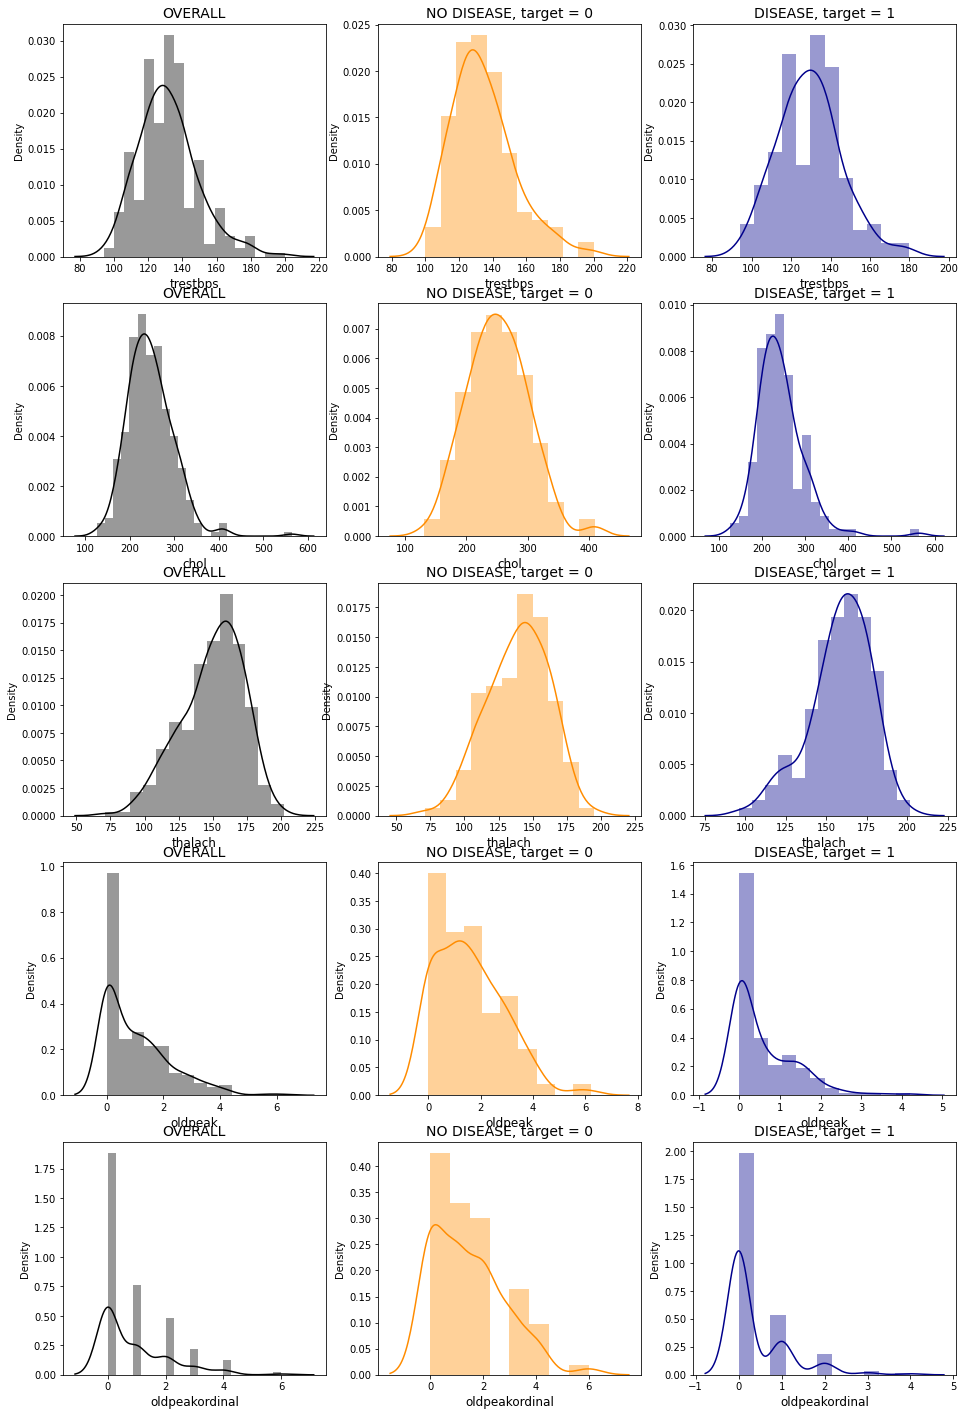

In [16]:
#  assign NUM dataframe for "no disease" and "disease"
no_diseaseNUM = dataNUM[(heart_disease_dataset['target'] == 'no disease')]
diseaseNUM    = dataNUM[(heart_disease_dataset['target'] == 'disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataNUM.columns)-1   #  x='age' in plots, drop column
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,30))

for i in dataNUM.columns.drop(["age","target"]):
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(heart_disease_dataset[i],color='black')
    subPlotNum = subPlotNum + 1
    # no_diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(no_diseaseNUM[i],color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(diseaseNUM[i],color='darkblue')
    subPlotNum = subPlotNum + 1

plt.show()

8.	What will be your criteria to select the classification algorithm?
9.	How will you evaluate the performance of two classifier that you investigated and state which is better
10. Can you deploy your model in real time? What are the challenges?


### 8. What will be your criteria to select the classification algorithm?

#### There are various factors that we have to consider when we have to choose a classification factor. Like we have to know what type of data we have. lets say we have data that is labelled. in tis case we could straight way use the supervised allgorithms.

#### Size of data also is a factor. Most algorithms works better with large dataset. for example on large dataset works well for K Nearest Neibour works well with large dataset, where as Naive Bayes works well with small data set.

#### SVM works well with dataset that has large number of feature set. other algorithms will take a longer time to train the model.

### 9. How will you evaluate the performance of two classifier that you investigated and state which is better

We have implemented Logistic regression and Decision Tree algorithm.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

heart_disease_dataset_raw = pd.read_csv("./heart.csv")

category = pd.cut(heart_disease_dataset_raw.age,bins=[29,53,77],
       labels=['0','1'])
heart_disease_dataset_raw.insert(1,'agegroup',category)

feature_cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca']
X = heart_disease_dataset_raw[feature_cols] # Features
y = heart_disease_dataset_raw.target # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(242, 12)
(61, 12)
(242,)
(61,)


### 9.1 Logistics regression


In [39]:
# instantiate the model (using the default parameters)
logregmodel = LogisticRegression(max_iter=1000)

# fit the model with data
logregmodel.fit(X_train,y_train)

#
y_pred=logregmodel.predict(X_test)

In [40]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[27,  3],
       [ 4, 27]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

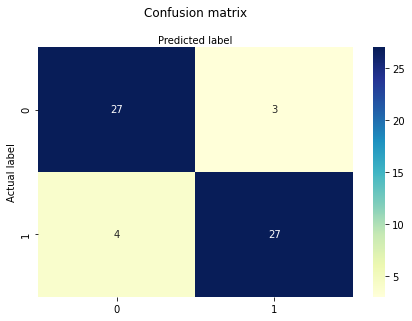

In [41]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8852459016393442
Precision: 0.9
Recall: 0.8709677419354839


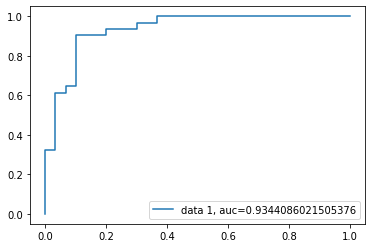

In [43]:
y_pred_proba = logregmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 9.2 Decision Tree

Accuracy:  0.8032786885245902


[Text(192.331914893617, 207.55636363636364, 'cp <= 0.5\ngini = 0.494\nsamples = 242\nvalue = [108, 134]'),
 Text(113.97446808510638, 187.7890909090909, 'ca <= 0.5\ngini = 0.415\nsamples = 109\nvalue = [77, 32]'),
 Text(60.54893617021276, 168.0218181818182, 'exang <= 0.5\ngini = 0.498\nsamples = 51\nvalue = [24, 27]'),
 Text(28.493617021276595, 148.25454545454545, 'age <= 41.5\ngini = 0.32\nsamples = 25\nvalue = [5, 20]'),
 Text(14.246808510638298, 128.48727272727274, 'sex <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(7.123404255319149, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(21.370212765957447, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(42.740425531914894, 128.48727272727274, 'oldpeak <= 2.45\ngini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(35.61702127659574, 108.72, 'chol <= 316.5\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(28.493617021276595, 88.95272727272729, 'chol <= 272.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),


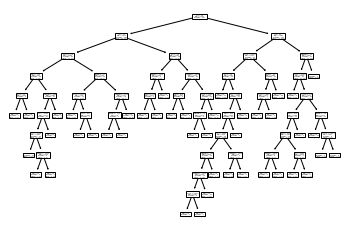

In [44]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

from sklearn import tree
tree.plot_tree(classifier, feature_names=feature_cols)

Accuracy: 0.819672131147541


[Text(167.4, 190.26, 'cp <= 0.5\nentropy = 0.992\nsamples = 242\nvalue = [108, 134]'),
 Text(83.7, 135.9, 'ca <= 0.5\nentropy = 0.873\nsamples = 109\nvalue = [77, 32]'),
 Text(41.85, 81.53999999999999, 'exang <= 0.5\nentropy = 0.998\nsamples = 51\nvalue = [24, 27]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.722\nsamples = 25\nvalue = [5, 20]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.84\nsamples = 26\nvalue = [19, 7]'),
 Text(125.55000000000001, 81.53999999999999, 'oldpeak <= 0.45\nentropy = 0.424\nsamples = 58\nvalue = [53, 5]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.811\nsamples = 16\nvalue = [12, 4]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.162\nsamples = 42\nvalue = [41, 1]'),
 Text(251.10000000000002, 135.9, 'age <= 55.5\nentropy = 0.783\nsamples = 133\nvalue = [31, 102]'),
 Text(209.25, 81.53999999999999, 'age <= 44.5\nentropy = 0.456\nsamples = 73\nvalue = [7, 66]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.0\nsamples

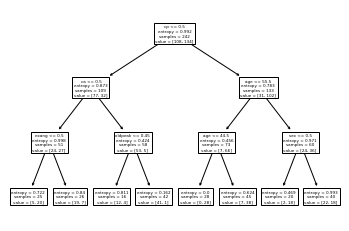

In [45]:
classifier_ent = DecisionTreeClassifier(criterion="entropy", max_depth=3)

classifier_ent = classifier_ent.fit(X_train,y_train)

y_pred = classifier_ent.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn import tree
tree.plot_tree(classifier_ent, feature_names=feature_cols)

### 9.3 Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d", X_test.shape[0], (y_test != y_pred).sum())

Number of mislabeled points out of a total %d points : %d 61 7
